**Linear Regression Model**
Dr. Al Rey Villagracia

In [ ]:
x=[0.698132, 0.959931, 1.134464, 1.570796, 1.919862]
y=[0.188224, 0.209138, 0.230052, 0.250965, 0.313707]
n = len(x)

In [ ]:
def lin_reg(x,y):

  x_mean = sum(x)/n    # theta_bar
  y_mean = sum(y)/n    # T_bar

  xy = sum([x[i]*y[i] for i in range(0,n)])
  S_xy = xy - n*x_mean*y_mean
  S_xx = sum([x[i]**2 for i in range(0,n)])-n*x_mean**2
  a1 = S_xy/S_xx
  a0 = y_mean - a1*x_mean

  return [a1,a0]

In [ ]:
[k1,k2] = lin_reg(x,y)

Text(0, 0.5, 'Torque (Nm)')

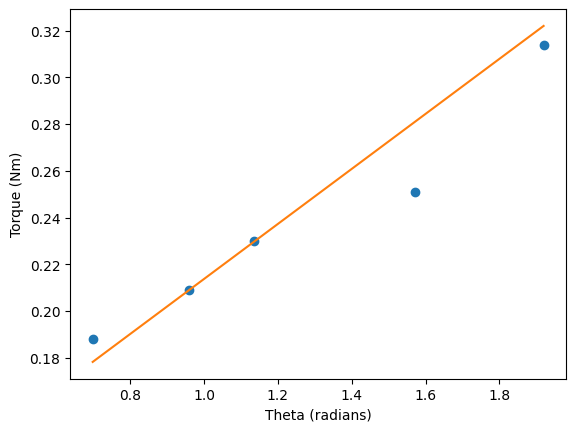

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x,y,'o')
y_calc = [k1+k2*x[i] for i in range(0,n)]

plt.plot(x,y_calc)
plt.xlabel('Theta (radians)')
plt.ylabel('Torque (Nm)')

**Exponential Regression Model**

In [ ]:
t_val=[0,1,3,5,7,9]
gamma_val = [1,0.891,0.708,0.562,0.447,0.355]

In [ ]:
from sympy import Symbol,exp
import numpy as np

n = len(t_val)


l = Symbol('l')


sum1 = sum([gamma_val[i]*t_val[i]*exp(l*t_val[i]) for  i in range(0,n) ])
sum2 = sum(gamma_val[i]*exp(l*t_val[i]) for i in range(n))
sum3 = sum(exp(2*l*t_val[i]) for i in range(n))
sum4 = sum(t_val[i] * exp(2*l*t_val[i]) for i in range(n))
f = sum1 - sum2/sum3*sum4


In [ ]:
def bisection(xu,xl,f):
  flag=False

  tol=0.00001
  xsol=0

  for i in range(1000):

    xm = (xu+xl)/2
    fm = f.subs(l,xm)
    fu = f.subs(l,xu)
    fl = f.subs(l,xl)

#    print(fm)
    if abs(fm) < tol:
      xsol = xm
      break

    if fl*fm < 0:
      xu=xm
    else:
      if fm*fu < 0:
        xl=xm
      else:
        break

  return xsol

l_val = bisection(-0.5,0,f)
print(l_val)
A = sum([gamma_val[i] * exp(l_val*t_val[i]) for i in range(n)]) / sum(exp(2*l_val*t_val[i]) for i in range(n))
print(A)

-0.1150827407836914
0.999840748855642
